In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
import sklearn.metrics as metrics
import numpy as np
import itertools


In [29]:
# Import `fake_or_real_news.csv` 
df = pd.read_csv("news.csv")
    
# Inspect shape of `df` 
df.shape

# Print first lines of `df` 
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [30]:
df.shape

(6335, 4)

In [28]:
# Set index 
df = df.set_index("Unnamed: 0")

# Print first lines of `df` 
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
# Set `y` 
y = df.label 

# Drop the `label` column
df.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [9]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [10]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [11]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']
['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [12]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [13]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [14]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [15]:
print(count_df.equals(tfidf_df))

False


In [16]:
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
clf = MultinomialNB() 

accuracy:   0.893
Confusion matrix, without normalization


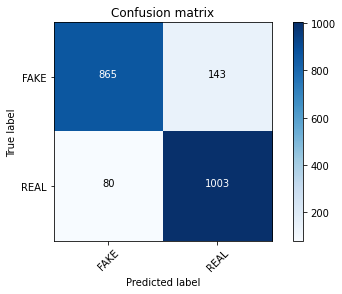

In [19]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [20]:
a=df[0:1]
b=df.text[4:5]

In [18]:
print(b)


Unnamed: 0
875    It's primary day in New York and front-runners...
Name: text, dtype: object


In [59]:
df

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE


In [32]:
sample = ["U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.Kerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington"]
print(clf.predict(count_vectorizer.transform(sample)))

['REAL']


In [20]:
data = "TV presenter Eamonn Holmes is at the centre of a controversy after casting doubt on media outlets that debunk the myth that 5G causes coronavirus."
sample = [data]
print(clf.predict(count_vectorizer.transform(sample)))

['FAKE']


In [21]:
sample = ["Why Trump doesn't control when the US closes or reopens CNN's National Security Analyst Juliette Kayyem explains who has the authority to put US citizens under lock down or quarantine. Watch the latest videos on Covid-19.Source: CNN"]
print(clf.predict(count_vectorizer.transform(sample)))

['REAL']


In [34]:
from sklearn.externals import joblib 
joblib.dump(clf, 'model.pkl')
joblib.dump(count_vectorizer,'cv.pkl')

joblib.dump(tfidf_vectorizer,'tfidfv.pkl')

['tfidfv.pkl']

In [44]:
!pip freeze

apyori==1.1.2
asn1crypto==0.24.0
attrs==17.4.0
backports-abc==0.5
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
certifi==2019.11.28
chardet==3.0.4
cryptography==2.1.4
cycler==0.10.0
decorator==4.1.2
enum34==1.1.6
firebase==3.0.0
funcsigs==1.0.2
futures==3.2.0
idna==2.8
ipaddress==1.0.17
ipykernel==4.8.2
ipython==5.5.0
ipython-genutils==0.2.0
joblib==0.14.1
jupyter-client==5.2.2
jupyter-core==4.4.0
keyring==10.6.0
keyrings.alt==3.0
kiwisolver==1.1.0
matplotlib==2.2.5
numpy==1.16.6
pandas==0.24.2
pathlib2==2.3.0
pexpect==4.2.1
pickleshare==0.7.4
pluggy==0.6.0
prompt-toolkit==1.0.15
py==1.5.2
pycrypto==2.6.1
pyfpgrowth==1.0
Pygments==2.2.0
pygobject==3.26.1
pyparsing==2.4.6
pytest==3.3.2
python-dateutil==2.8.1
pytz==2019.3
pyxdg==0.25
pyzmq==16.0.2
requests==2.22.0
scandir==1.7
scikit-learn==0.20.4
scipy==1.2.3
seaborn==0.9.1
SecretStorage==2.3.1
simplegeneric==0.8.1
singledispatch==3.4.0.3
six==1.14.0
sklearn==0.0
subprocess32==3.5.4
tornado==4.5.3
traitl